In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
def skin_segmentation(image):
    ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    lower = np.array([0, 133, 77], dtype=np.uint8)
    upper = np.array([255, 173, 127], dtype=np.uint8)
    mask = cv2.inRange(ycrcb, lower, upper)
    return mask

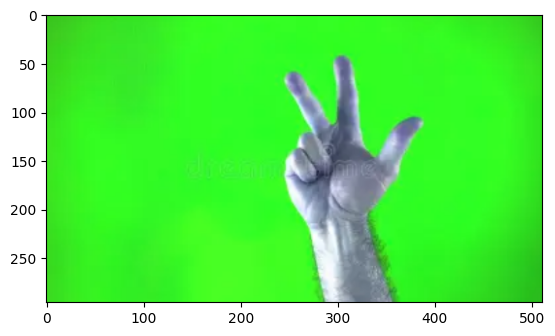

In [3]:
image = cv2.imread('./image2.png')
plt.imshow(image)

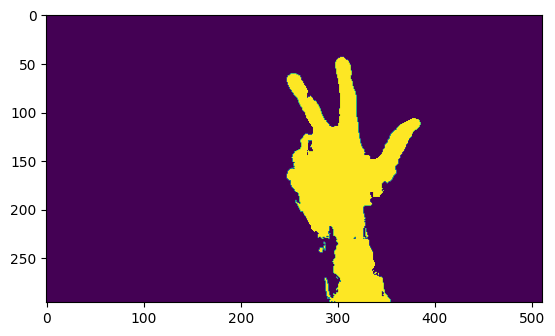

In [4]:
seg_image = skin_segmentation(image)
plt.imshow(seg_image)

In [5]:
def find_hand_contours(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        max_contour = max(contours, key=cv2.contourArea)
        return max_contour
    return None

In [6]:
contour_image = find_hand_contours(seg_image)

In [81]:
contour_image = contour_image.squeeze()

In [12]:
convex = cv2.convexHull(contour_image, returnPoints=False)
convex_pts = cv2.convexHull(contour_image).squeeze()

In [13]:
print(convex_pts)

[[306  44]
 [310  47]
 [383 108]
 [384 109]
 [385 111]
 [385 113]
 [354 295]
 [292 295]
 [290 292]
 [248 168]
 [248  65]
 [249  63]
 [252  61]
 [303  44]]


In [16]:
contour_image_sq = contour_image.squeeze()

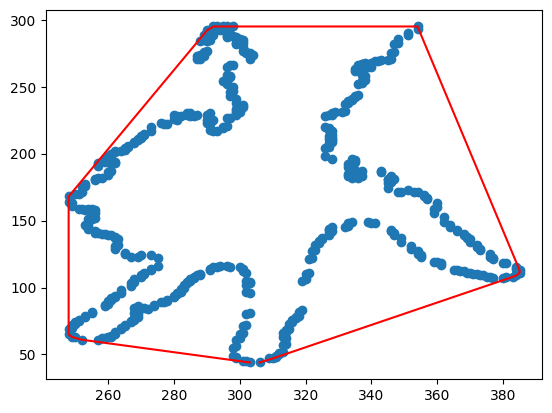

In [17]:
plt.plot(convex_pts[:, 0], convex_pts[:, 1], color='red')
plt.scatter(contour_image_sq[:, 0], contour_image_sq[:, 1])

In [18]:
conv_def = cv2.convexityDefects(contour_image, convex)

[    0    80    25 17000]
[ 80  82  81 142]
[ 82  84  83 114]
[  84  157  116 6912]
[ 157  299  235 7434]
[299 306 302 568]
[306 313 308 256]
[  313   440   376 11236]
[441 443 442 114]
[  444   523   483 16297]
[523 525 524 154]


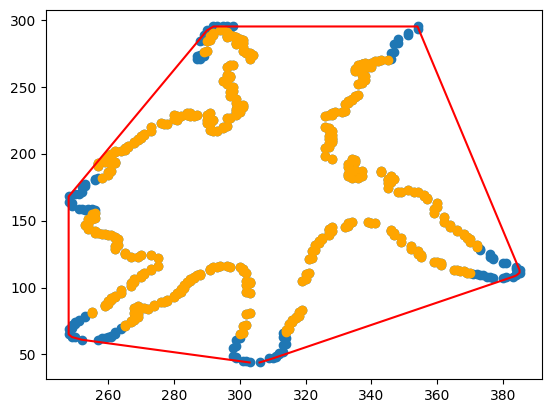

In [21]:
plt.plot(convex_pts[:, 0], convex_pts[:, 1], color='red')
plt.scatter(contour_image_sq[:, 0], contour_image_sq[:, 1])
for idx in conv_def.squeeze():
    print(idx)
    
    plt.scatter(contour_image_sq[idx[0] +10:idx[1] - 10, 0], contour_image_sq[idx[0] + 10:idx[1] - 10, 1], color='orange')

In [78]:
print(convex.shape)

(14, 1)


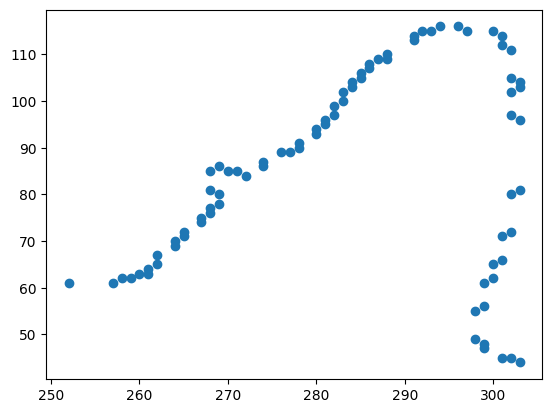

In [52]:
plt.scatter(contour_image[0:81, 0], contour_image[0:81, 1])